         Date       Open       High        Low      Close  Adj Close  \
0  2000-01-03  16.600000  17.000000  16.600000  17.000000  14.130291   
1  2000-01-04  18.200001  18.344999  17.100000  17.379999  14.446143   
2  2000-01-05  17.000000  17.389999  16.500000  16.695000  13.876778   
3  2000-01-06  16.799999  17.000000  16.530001  16.830000  13.988989   
4  2000-01-07  16.215000  17.100000  16.215000  16.834999  13.993148   

      Volume  
0   332590.0  
1  1687100.0  
2  1598200.0  
3   850260.0  
4   851440.0  


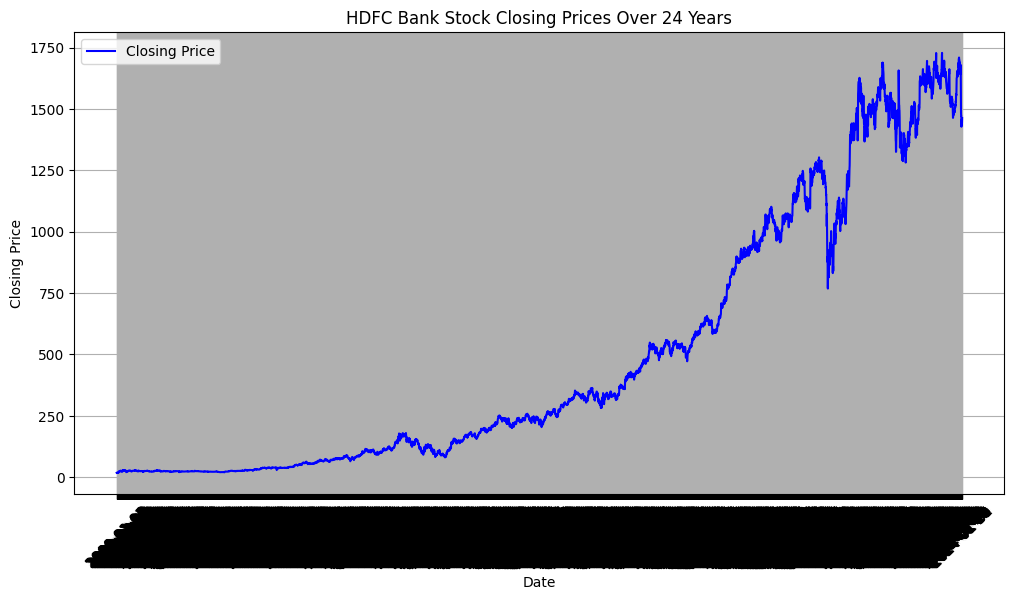

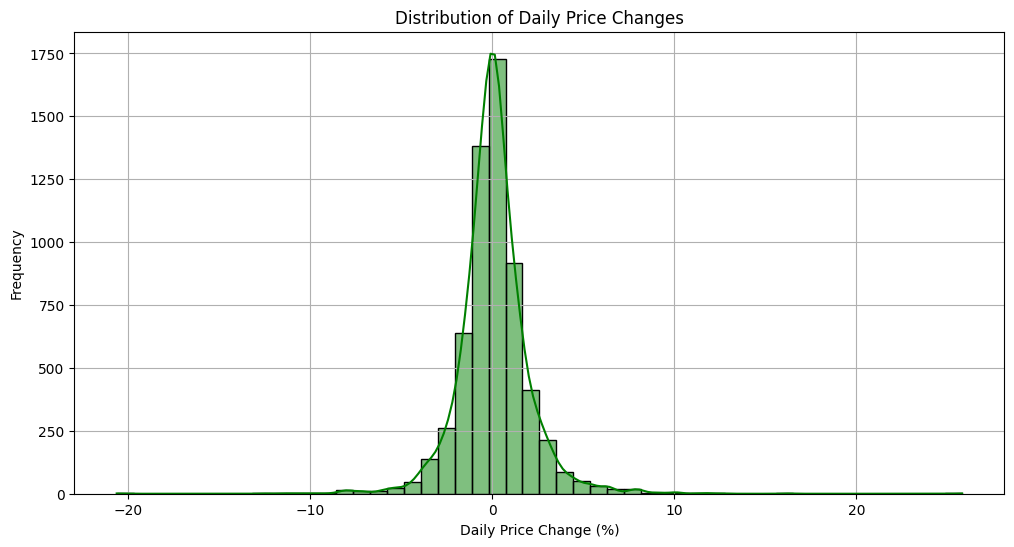

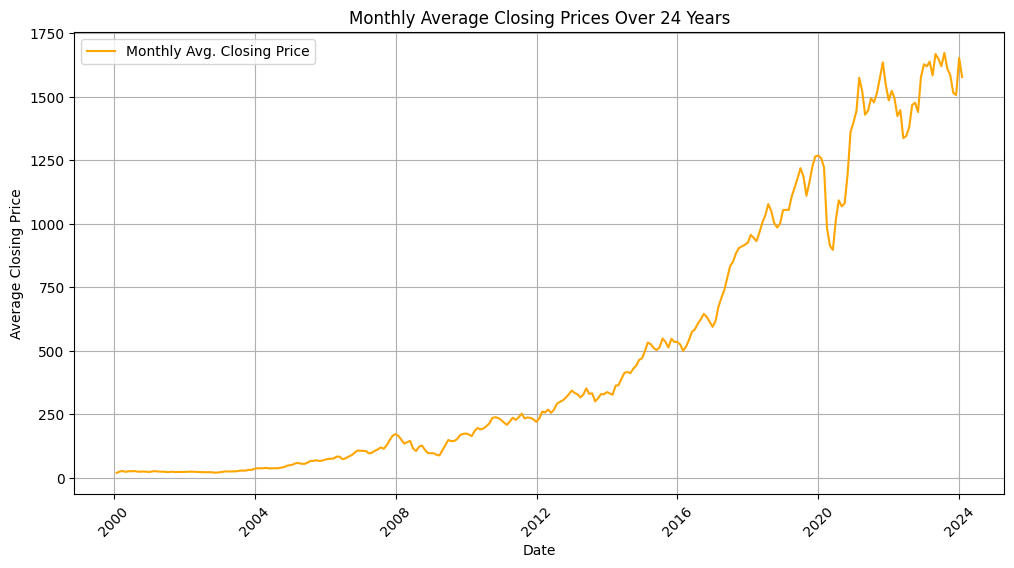

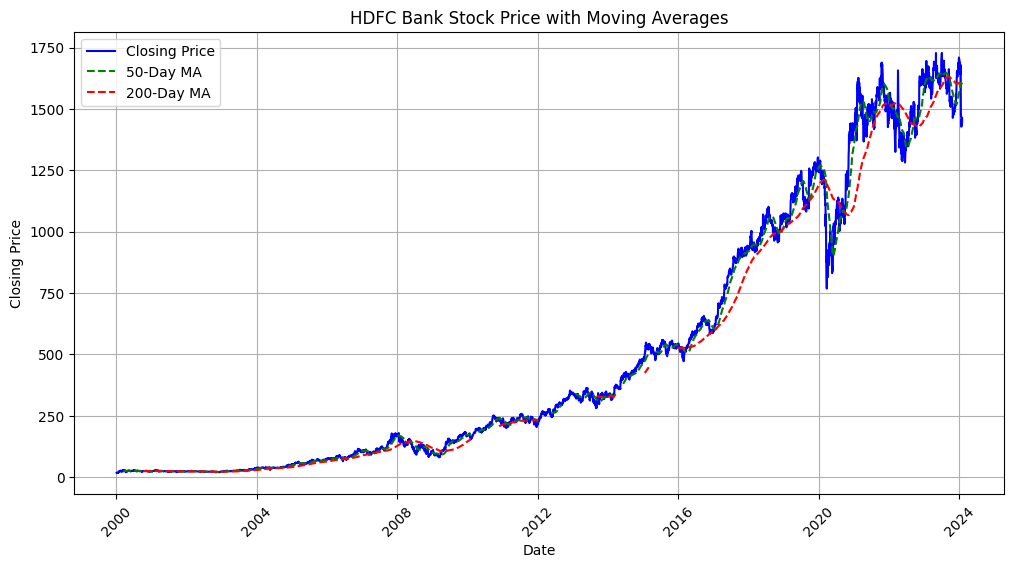

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Basic Statistics and Visualization
data.describe()

# Line plot of Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('HDFC Bank Stock Closing Prices Over 24 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Daily Price Change (Volatility)
data['Price Change'] = data['Close'].pct_change() * 100  # Calculate daily percentage change
plt.figure(figsize=(12, 6))
sns.histplot(data['Price Change'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Daily Price Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Monthly Average Closing Prices
data['Date'] = pd.to_datetime(data['Date'])
monthly_average = data.resample('M', on='Date').mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_average.index, monthly_average['Close'], label='Monthly Avg. Closing Price', color='orange')
plt.title('Monthly Average Closing Prices Over 24 Years')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Moving Average Analysis
data['50_Day_MA'] = data['Close'].rolling(window=50).mean()
data['200_Day_MA'] = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.plot(data['Date'], data['50_Day_MA'], label='50-Day MA', linestyle='--', color='green')
plt.plot(data['Date'], data['200_Day_MA'], label='200-Day MA', linestyle='--', color='red')
plt.title('HDFC Bank Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Additional Analysis...
# You can add more sections and visualizations based on your specific analysis requirements.

# Save or export the visualizations if needed
# For example: plt.savefig('closing_prices.png')


         Date       Open       High        Low      Close  Adj Close  \
0  2000-01-03  16.600000  17.000000  16.600000  17.000000  14.130291   
1  2000-01-04  18.200001  18.344999  17.100000  17.379999  14.446143   
2  2000-01-05  17.000000  17.389999  16.500000  16.695000  13.876778   
3  2000-01-06  16.799999  17.000000  16.530001  16.830000  13.988989   
4  2000-01-07  16.215000  17.100000  16.215000  16.834999  13.993148   

      Volume  
0   332590.0  
1  1687100.0  
2  1598200.0  
3   850260.0  
4   851440.0  
              Open         High          Low        Close    Adj Close  \
count  6015.000000  6015.000000  6015.000000  6015.000000  6015.000000   
mean    494.377194   499.135055   489.214202   494.273516   475.535673   
std     526.869514   531.211469   522.195061   526.698021   519.589819   
min      16.215000    16.790001    15.700000    16.340000    13.581703   
25%      68.000000    69.345001    66.867501    67.942497    59.814743   
50%     243.800003   246.449997  

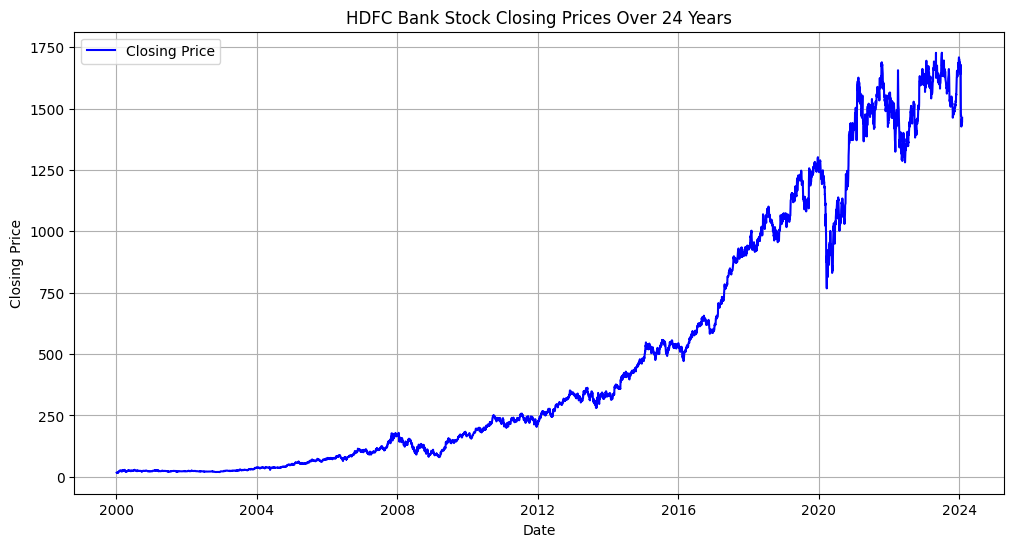

Annual Volatility: 30.94%


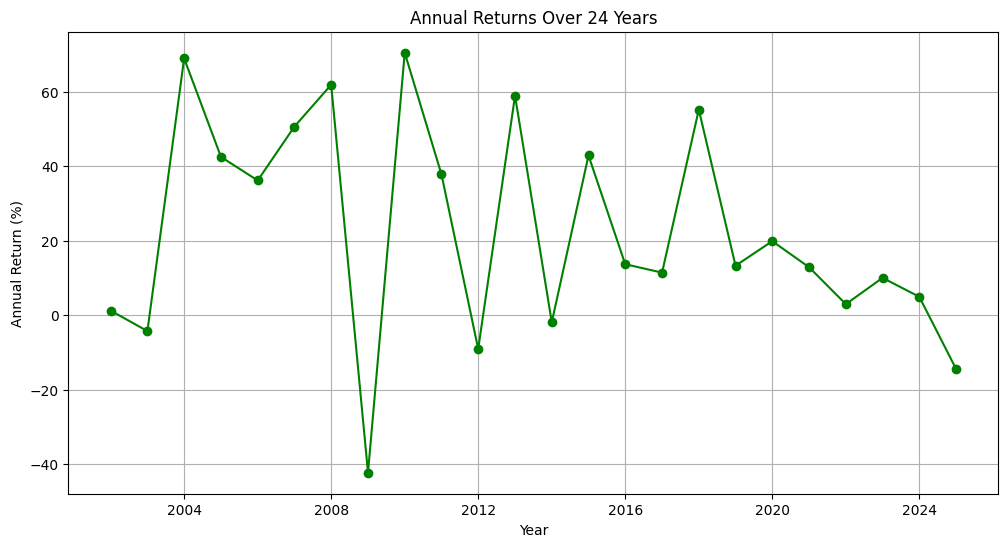

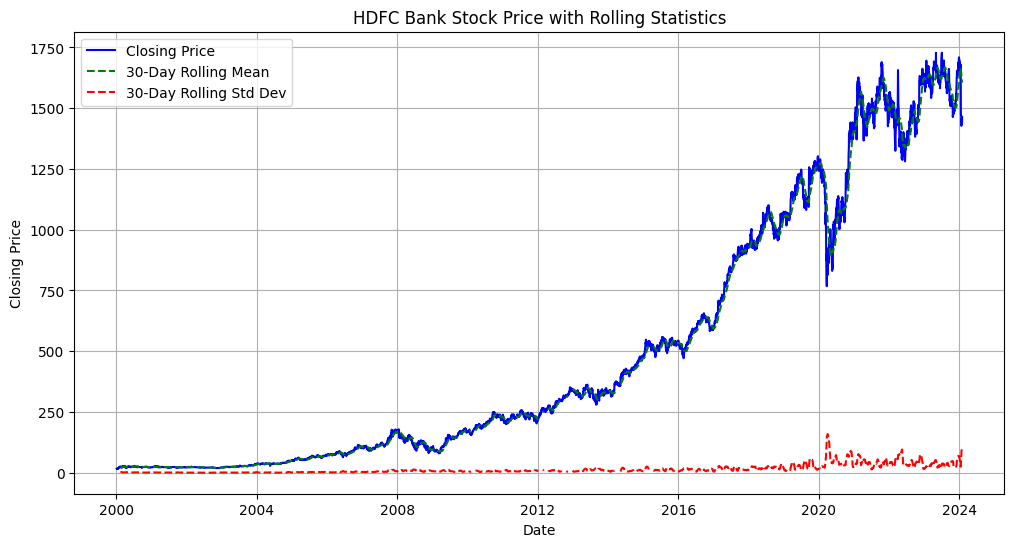

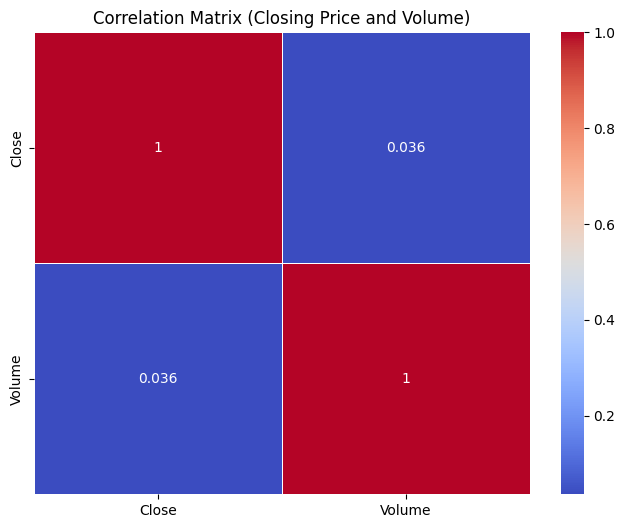

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Basic Statistics and Visualization
print(data.describe())

# Line plot of Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.title('HDFC Bank Stock Closing Prices Over 24 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Daily Returns
data['Daily Return'] = data['Close'].pct_change() * 100

# Volatility Analysis
annual_volatility = data['Daily Return'].std() * np.sqrt(252)  # Assuming 252 trading days in a year
print(f'Annual Volatility: {annual_volatility:.2f}%')

# Annual Returns
annual_returns = data['Close'].resample('Y').ffill().pct_change() * 100
plt.figure(figsize=(12, 6))
plt.plot(annual_returns, marker='o', linestyle='-', color='green')
plt.title('Annual Returns Over 24 Years')
plt.xlabel('Year')
plt.ylabel('Annual Return (%)')
plt.grid(True)
plt.show()

# Rolling Statistics
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(rolling_mean, label='30-Day Rolling Mean', linestyle='--', color='green')
plt.plot(rolling_std, label='30-Day Rolling Std Dev', linestyle='--', color='red')
plt.title('HDFC Bank Stock Price with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Correlation Matrix
correlation_matrix = data[['Close', 'Volume']].pct_change().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Closing Price and Volume)')
plt.show()


           Daily Return
Monday         0.005900
Tuesday        0.084264
Wednesday      0.162776
Thursday       0.113085
Friday         0.097707


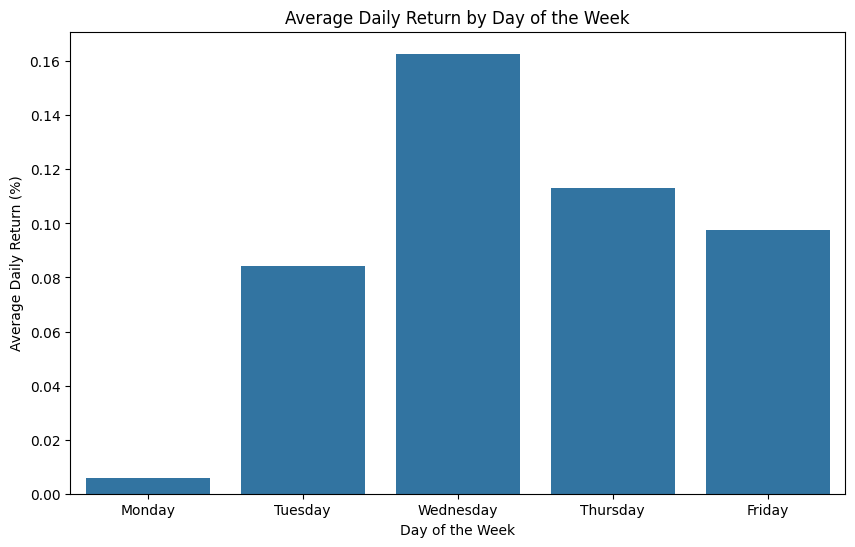

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change() * 100

# Create a new column for the day of the week (Monday=0, Sunday=6)
data['Day of Week'] = data.index.dayofweek

# Specify the order of days of the week
days_order = [0, 1, 2, 3, 4]  # Monday to Friday

# Create a pivot table to show the average return for each day of the week
pivot_table = data.pivot_table(values='Daily Return', index='Day of Week', aggfunc='mean')

# Reorder the index to match the specified order
pivot_table = pivot_table.reindex(days_order)

# Rename the days of the week for better visualization
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
pivot_table.index = days_of_week

# Display the pivot table
print(pivot_table)

# Plot the average returns for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_table.index, y=pivot_table['Daily Return'])
plt.title('Average Daily Return by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Return (%)')
plt.show()


Average Daily Return: 0.0929%
Annualized Volatility: 30.9418%


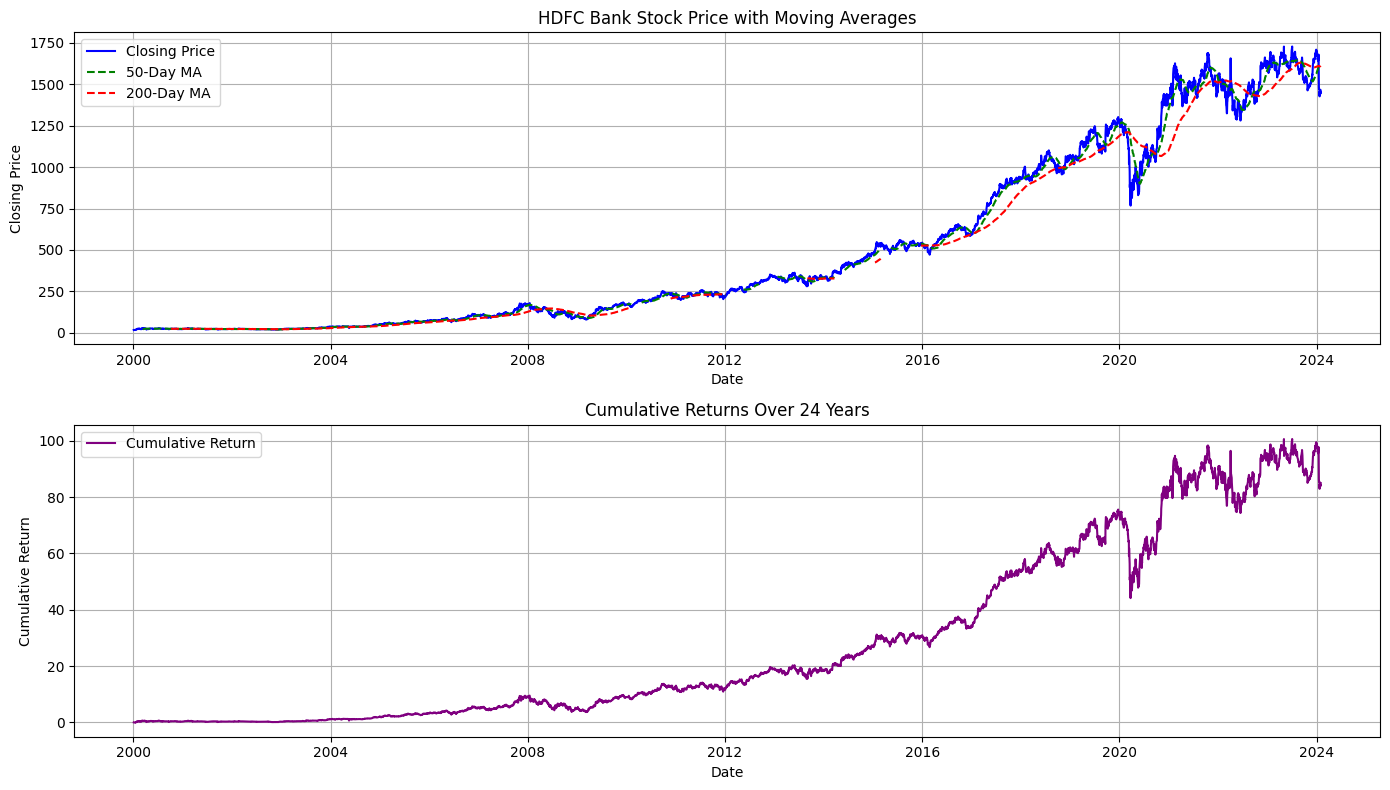

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change() * 100

# Calculate cumulative returns
data['Cumulative Return'] = (1 + data['Daily Return'] / 100).cumprod() - 1

# Calculate rolling volatility (30-day window)
data['Rolling Volatility'] = data['Daily Return'].rolling(window=30).std()

# Simple Risk-Return Analysis
average_daily_return = data['Daily Return'].mean()
annualized_volatility = data['Daily Return'].std() * np.sqrt(252)  # Assuming 252 trading days in a year

print(f'Average Daily Return: {average_daily_return:.4f}%')
print(f'Annualized Volatility: {annualized_volatility:.4f}%')

# Moving Averages
data['50_Day_MA'] = data['Close'].rolling(window=50).mean()
data['200_Day_MA'] = data['Close'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(14, 8))

# Closing Prices with Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['50_Day_MA'], label='50-Day MA', linestyle='--', color='green')
plt.plot(data['200_Day_MA'], label='200-Day MA', linestyle='--', color='red')
plt.title('HDFC Bank Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Cumulative Returns
plt.subplot(2, 1, 2)
plt.plot(data['Cumulative Return'], label='Cumulative Return', color='purple')
plt.title('Cumulative Returns Over 24 Years')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Calculate daily returns if not already available
data['Daily Return'] = data['Close'].pct_change() * 100

# Calculate average monthly return
average_monthly_return = data['Daily Return'].resample('M').mean()

# Display the results
print(average_monthly_return)


Date
2000-01-31    1.774449
2000-02-29   -0.349589
2000-03-31    0.827623
2000-04-30   -0.112753
2000-05-31   -0.245106
                ...   
2023-09-30   -0.138287
2023-10-31   -0.161156
2023-11-30    0.273288
2023-12-31    0.466555
2024-01-31   -0.681874
Freq: M, Name: Daily Return, Length: 289, dtype: float64


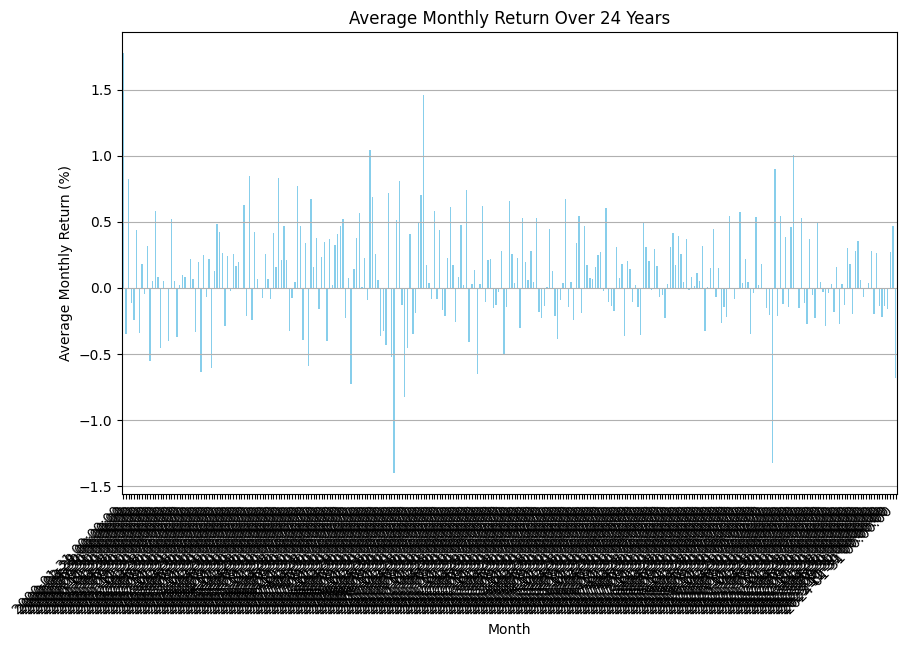

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Calculate daily returns if not already available
data['Daily Return'] = data['Close'].pct_change() * 100

# Calculate average monthly return
average_monthly_return = data['Daily Return'].resample('M').mean()

# Plotting
plt.figure(figsize=(10, 6))
average_monthly_return.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Return Over 24 Years')
plt.xlabel('Month')
plt.ylabel('Average Monthly Return (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()


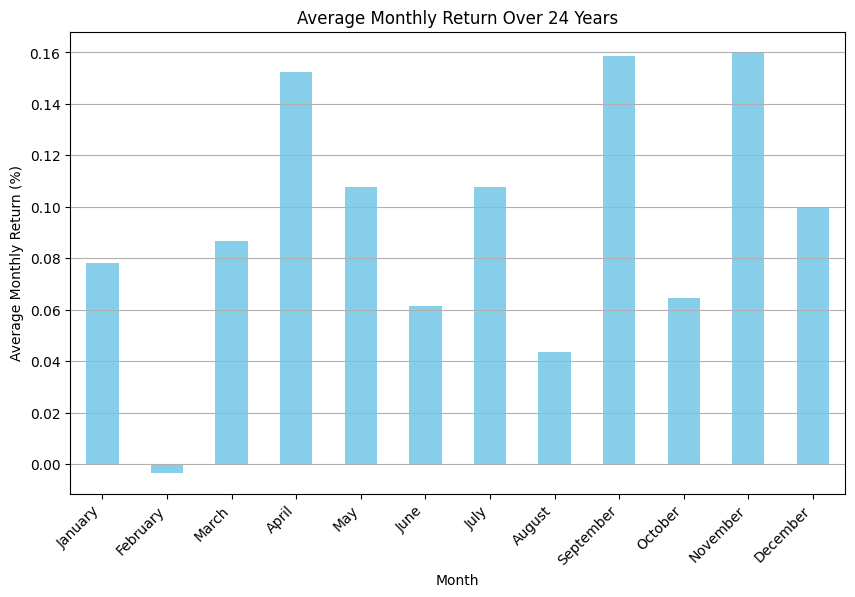

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Calculate daily returns if not already available
data['Daily Return'] = data['Close'].pct_change() * 100

# Extract the month from the 'Date' index
data['Month'] = data.index.month

# Calculate average return for each month
average_return_by_month = data.groupby('Month')['Daily Return'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_return_by_month.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_return_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Return Over 24 Years')
plt.xlabel('Month')
plt.ylabel('Average Monthly Return (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()


Mean Squared Error: 12.69


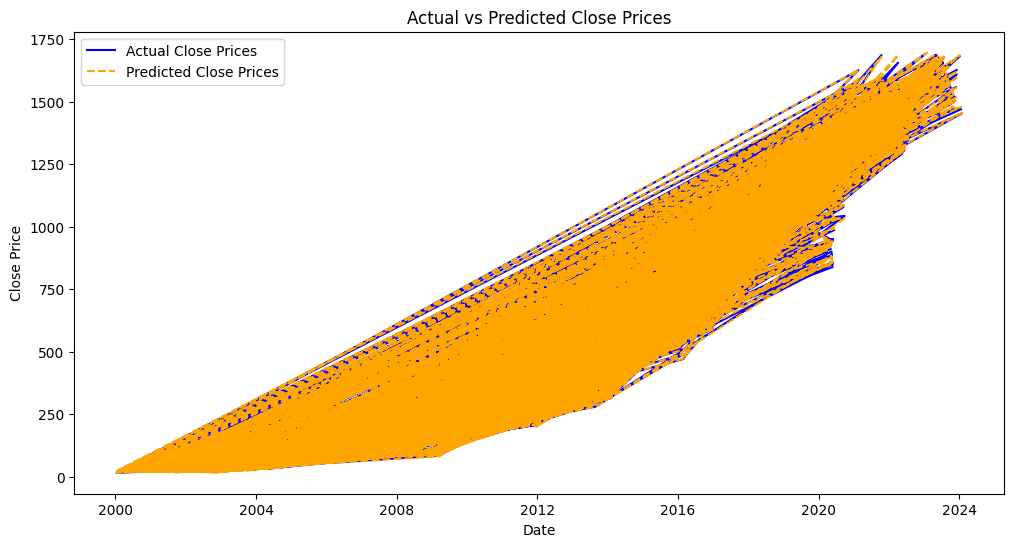

Average Predicted Return: 0.03


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Calculate daily returns if not already available
data['Daily Return'] = data['Close'].pct_change() * 100

# Drop NaN values
data.dropna(inplace=True)

# Features (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'Volume', 'Daily Return']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Prices', linestyle='--', color='orange')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate average predicted return
average_predicted_return = np.mean(y_pred - y_test)
print(f'Average Predicted Return: {average_predicted_return:.2f}')


Epoch 1/50
151/151 [==============================] - 4s 10ms/step - loss: 0.0017
Epoch 2/50
151/151 [==============================] - 1s 8ms/step - loss: 2.4382e-05
Epoch 3/50
151/151 [==============================] - 1s 6ms/step - loss: 2.1310e-05
Epoch 4/50
151/151 [==============================] - 1s 6ms/step - loss: 2.1690e-05
Epoch 5/50
151/151 [==============================] - 1s 6ms/step - loss: 2.0559e-05
Epoch 6/50
151/151 [==============================] - 1s 6ms/step - loss: 2.2461e-05
Epoch 7/50
151/151 [==============================] - 1s 6ms/step - loss: 2.1169e-05
Epoch 8/50
151/151 [==============================] - 1s 6ms/step - loss: 2.5311e-05
Epoch 9/50
151/151 [==============================] - 1s 6ms/step - loss: 2.1001e-05
Epoch 10/50
151/151 [==============================] - 1s 7ms/step - loss: 2.2256e-05
Epoch 11/50
151/151 [==============================] - 1s 6ms/step - loss: 2.2626e-05
Epoch 12/50
151/151 [==============================] - 1s 7ms/step

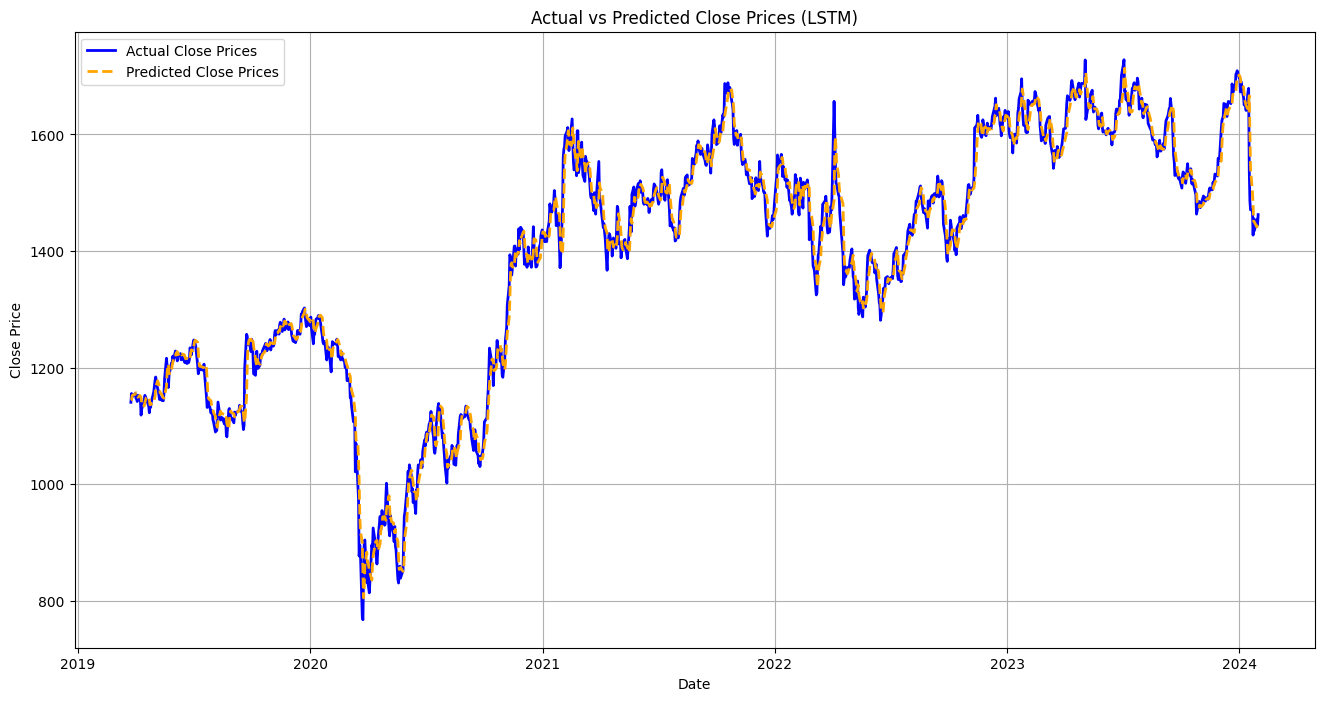

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Use only 'Close*' prices for simplicity
data = data[['Close']]

# Drop NaN values
data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

# Define sequence length and create sequences
sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test_actual, y_pred_actual)
print(f'Mean Squared Error: {mse:.2f}')

# Plot actual vs predicted prices
plt.figure(figsize=(16, 8))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label='Actual Close Prices', color='blue', linewidth=2)
plt.plot(data.index[-len(y_pred_actual):], y_pred_actual, label='Predicted Close Prices', linestyle='--', color='orange', linewidth=2)
plt.title('Actual vs Predicted Close Prices (LSTM)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
!pip install pywt neupy pandas numpy


ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [18]:
import pywt
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/HDFCBANK.NS (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Use only 'Close*' prices for simplicity
data = data[['Close']]

# Apply wavelet transform
coefficients = pywt.wavedec(data['Close'], 'db1', level=5)

